In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.cluster import k_means, kmeans_plusplus, KMeans
from sklearn.decomposition import PCA
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Assignment 3 - Clustering

For this assignment you'll need to use some clustering knowledge to build a function that can generate handwritten numbers from a provided number. 

The modelling parts of this assignment are not very complex, the application of the clustering algorithms is very similar to the examples from class. This will require a little more manipulation of data, and building a little bit of structure around the models, that's where some of the challenge lies. 

## Requirements
<ul>
<li>Use clustering to take the X data (the features/pixels) of the MNIST dataset, and group it into clusters. 
    <ul>
    <li> Do not use the targets from the dataset at all. 
    <li> Use as many clusters as you think is appropriate.
    </ul>
<li>Assign labels to your clusters, so there is now a label for each cluster. You'll need to manually do a little mapping here by eye. 
<li><b>So, to this point. You take the images, ditch their labels, and do clustering to group them. You don't know which cluster is which digit. You have to then label them, or look at each one and say, "looks like 7s", then assign that group a label of 7. </b>
<li>Use GMM to build a function that can generate a new digit from the information in the cluster. 
<li>Write a function, writeNumber, that can take in an integer (you can assume it is between 1 and 20 digits, this is mostly for printing purposes, the modelling part isn't impacted by this at all) and print out that integer as a generated handwritten number. 
<li><b>When generating the handwritten numbers, each version of a digit should be different. I.e. If the number printed is 22222, there should not be 5 identical 2s, they should vary a bit like real writing. Each digit should be a new generation of data.</b>
</ul>

## Deliverables
Submit your .ipynb file to the Moodle dropbox. PLEASE make sure that the file runs BY ITSELF outside of importing libraries. It should not reference any other files, either data or code. 

Within your file, create a function called writeNumber, which takes a number as an input, and prints it out as a series of handwritten digits. The function should be callable like this, if I wanted to print the number 218201

~~~
writeNumber(218201)
~~~

This would produce something that looks, somewhat, like this:

![Writing Example](example.png "Writing Example" )

The exact appearance of the generated writing can vary, it likely won't be as well defined as this picture. As long as I can read it as a number, it is fine. 

Hint: the number of clusters may vary. 

## Grading
<ul>
<li> 70% - Code works. This is mostly a yes/no thing, if it doesn't work I'll try to see if it was a small or large issue in the code, but it largely works or it doesn't. 
<li> 20% - Numbers appearance. Is the writing OK? I'm not going to be overly picky, if they are reasonably legible, that is fine. 
<li> 10% - Code legibility. Is a quick read over of the code clear? Sections, comments, etc... 
</ul>

## Load Data
<b> Please do not change this (substantially), probably outside of choosing between the full data and a subset. Don't load the target. </b>

Note: testing will be much faster with a subset of records. 

In [63]:
#Load Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
#mnist = mnist[0:15000]
X = mnist["data"]
print(X.shape)

(70000, 784)


## Cluster 

We need to break the data into clusters first... 

In [64]:
#Look at an image
def showDigit(digit, label, size=28):
    some_digit = digit
    #turn array into the correct shape
    some_digit_image = np.array(some_digit).reshape(size, size)
    #imshow displays an array like an image
    plt.imshow(some_digit_image, cmap=mpl.cm.binary)
    plt.title(label)
    plt.axis("off")
    plt.show()

#Display multiple digits
def showDigits(digits, labels, indexes, size=28):
    #Make a grid that is the right size
    pics = len(indexes)
    cols = 6
    rows = math.ceil(pics/cols)
    fig, axes = plt.subplots(rows, cols, figsize=(14,6))
    plt.axis("off")

    #loop through the list of indexes, grab images and labels, plot in the "next" spot. 
    for i in range(0, pics):
        n = indexes[i]
        some_digit = digits[n:n+1]
        some_digit_image = np.array(some_digit).reshape(size, size)
        ax = axes[i//cols, i%cols]
        ax.axis("off")
        ax.imshow(some_digit_image, cmap=mpl.cm.binary)
        ax.set_title('Ind: {} - Lbl: {}'.format(indexes[i], labels[n]))
    plt.tight_layout()
    plt.axis("off")
    plt.show()

In [65]:
indexes = np.array(range(0,24))

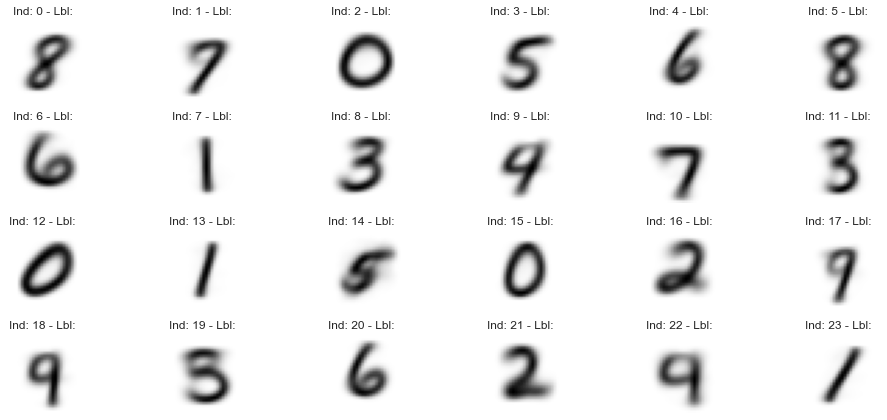

In [66]:
kmeans = KMeans(n_clusters=24, init="k-means++", random_state=12)
clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape

centers = kmeans.cluster_centers_.reshape(24, 28, 28)
showDigits(digits=centers, labels=[" ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " "], indexes=indexes, size=28)

In [67]:
indexes.size

24

In [68]:
centers.size

18816

### Cluster with PCA

In [69]:
pca_ = PCA()
data = pca_.fit_transform(X)
data.shape


(70000, 784)

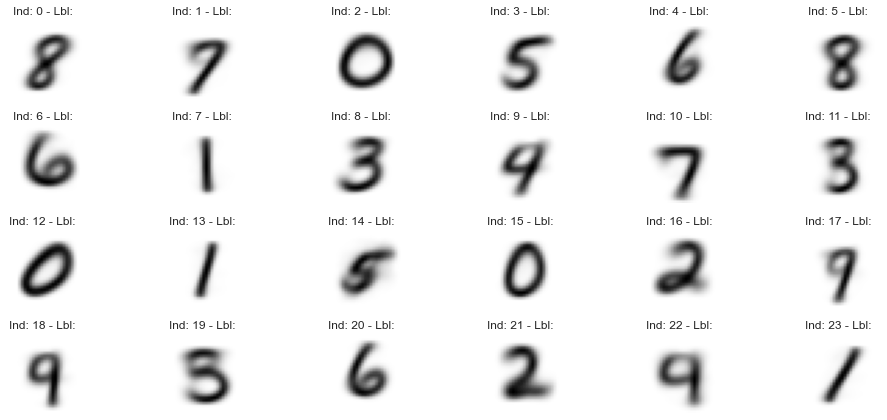

In [70]:
kmeans = KMeans(n_clusters=24, init="k-means++", random_state=12)
clusters = kmeans.fit_predict(data)

centers = pca_.inverse_transform(kmeans.cluster_centers_).reshape(24, 28, 28)
showDigits(digits=centers, labels=[" ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " "], indexes=indexes, size=28)

## Match the clusters

In [71]:
mapmatch = {0:8, 1:7, 2:0, 3:5, 4:6, 5:8, 6:6, 7:1, 8:3, 9:4, 10:7, 11:3, 12:0, 13:1, 14:5, 15:0, 16:2, 17:9, 18:9, 19:3, 20:6, 21:2, 22:9, 23:1}

In [72]:
df = pd.DataFrame(X)
df['cluster_label']= kmeans.labels_
df['cluster_label'].value_counts()

18    4221
17    3850
11    3645
9     3446
19    3339
7     3260
1     3247
14    3227
13    3200
22    3083
21    2936
8     2890
0     2865
20    2798
4     2782
16    2766
5     2735
10    2636
23    2433
2     2318
3     2317
12    2226
15    2031
6     1749
Name: cluster_label, dtype: int64

In [73]:
df['cluster_label'] = df['cluster_label'].map(mapmatch)
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,cluster_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [76]:
df['cluster_label'].value_counts()

9    11154
3     9874
1     8893
6     7329
0     6575
7     5883
2     5702
8     5600
5     5544
4     3446
Name: cluster_label, dtype: int64

In [104]:
def showDigits(digits, labels, indexes, size=28):
    plt.figure(figsize=(8,8))
    for i in range(len(indexes)):
        some_digit = digits[indexes[i]]
        some_digit_image = some_digit.reshape(size,size)
        ax = plt.subplot(5, 5, i+1)
        ax.axis("off")
        ax.imshow(some_digit_image, cmap=mpl.cm.binary)
        ax.set_title('Ind: {} - Lbl: {}'.format(indexes[i], labels[i]))
    plt.tight_layout()
    plt.axis("off")
    plt.show()

[ 8531  4852 15704 63584 67225 12107 11574 16905  2839 15882 61590 38914
 43273 57027 37619 63013 61411  7830 47046 53536  7552 49739  7130  8253]
0


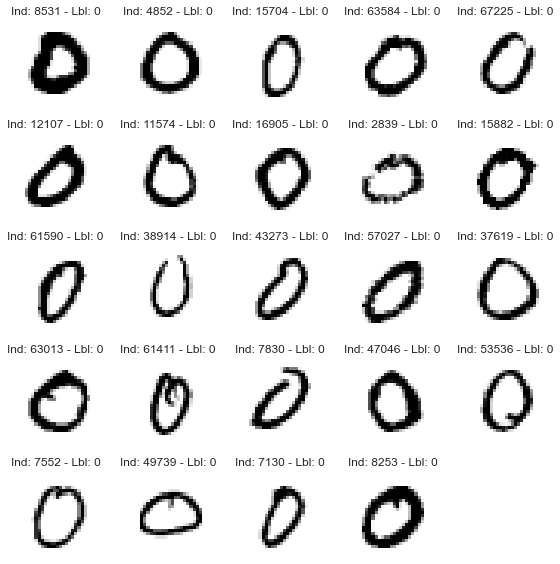

[18182 50273 28250  7631  4193 55995  5128 40298 41340 19410 65258  2695
 48741 40779 17889 47935  2318 64303 30898 22153 63922 47621 16080 39520]
1


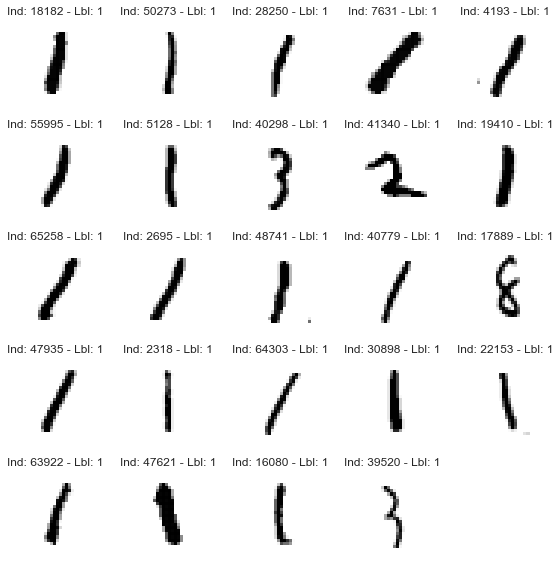

[27721  7431 59110 66534 43994 29904 54408 19755 40881 37199  3765 49098
 20786 39323 42254 13059 65167  1987 29911 39930 22713 32947 61335 59971]
2


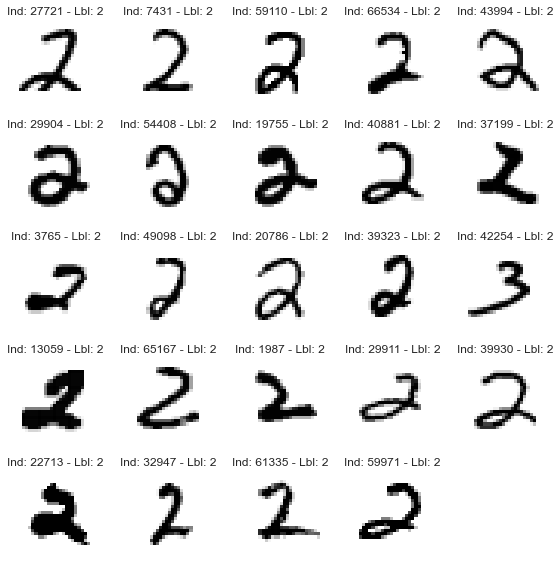

[ 1185 28198 10155 15945 41688 29924 14864 50253  5013 59334 40159 33444
 16370 10796 35195 39562 27741 55858 12920 39085 21695 68171 17781 34448]
3


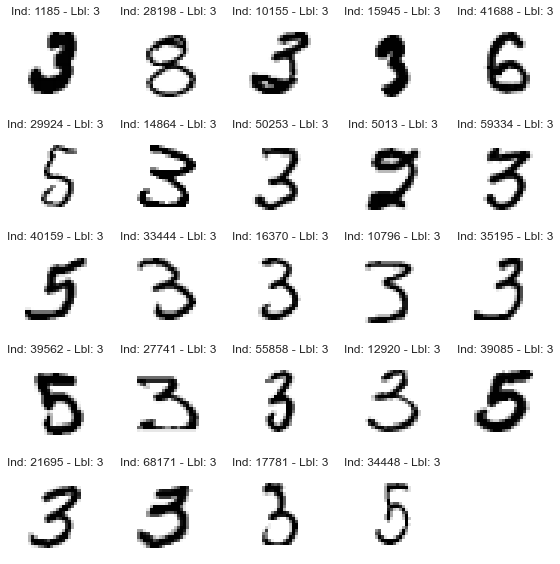

[31926 33156 51368 67579 57209 65741 67242 68136 16566  4382 49940 47909
 48938 50014  2911  3315 66373 10445 43810 63615 58504 58761 59111 66769]
4


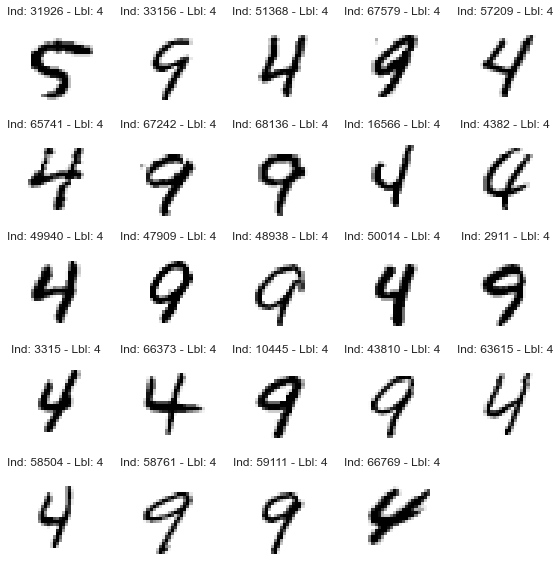

[67408 11709 23518 36692 24852 50764 28066 14522  2945 44329 69584 46091
 54067 26736  9795 63462 12087  4969  7510 12577 28360  5309 45295 54394]
5


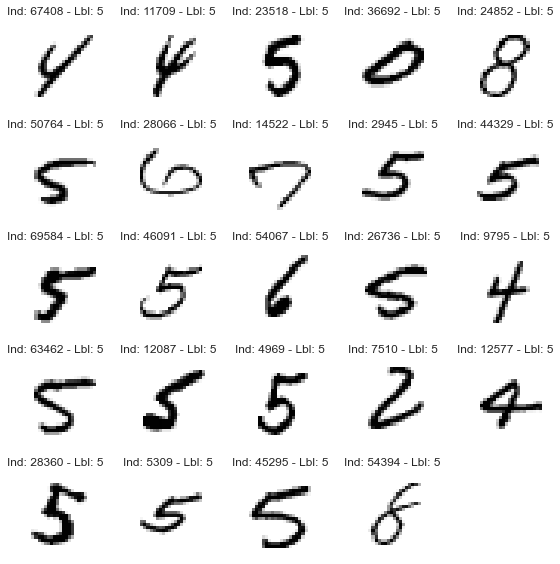

[42513 48706 19095 58415  3172 28102 45935 21294 54848 34413 43874 13671
 49178  7466 34963 31572 59966 67159 38128 32927 45713 27275 27390 40917]
6


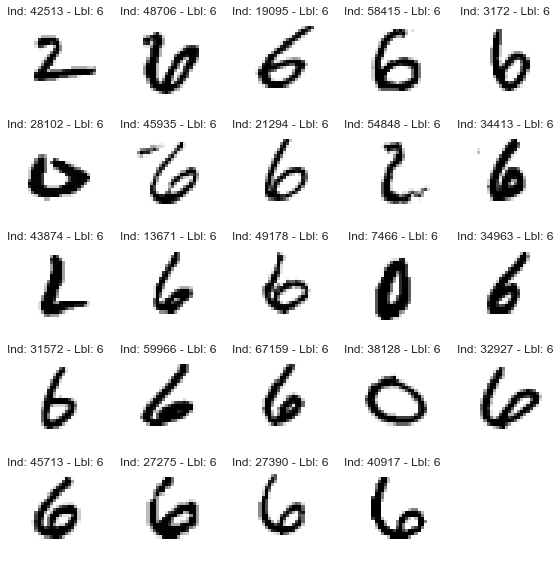

[59031  8718 52103 43818 23271 28535 17211  1347 34435 12641 38265 10394
  4794 12116 40193 23051 13205  9905 43346 67744 37471 11591 48122  4984]
7


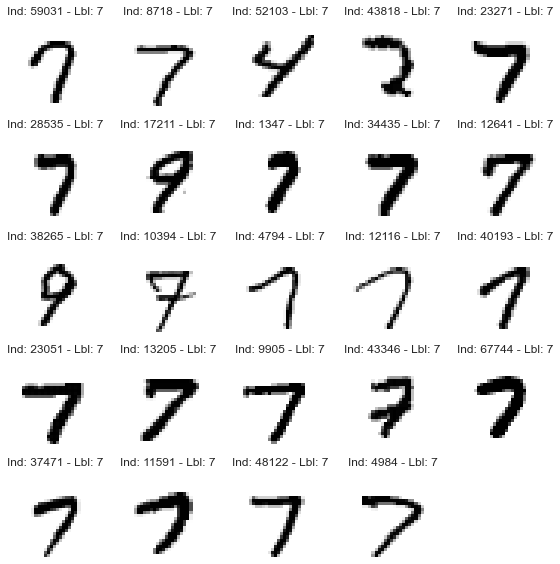

[46508 58296 38863   923 65648 55436  2805 19223 13559  2482 10249 47438
 57238 67181 41504 55989 40106  6187 15502 64707 66739 54569 68778 13301]
8


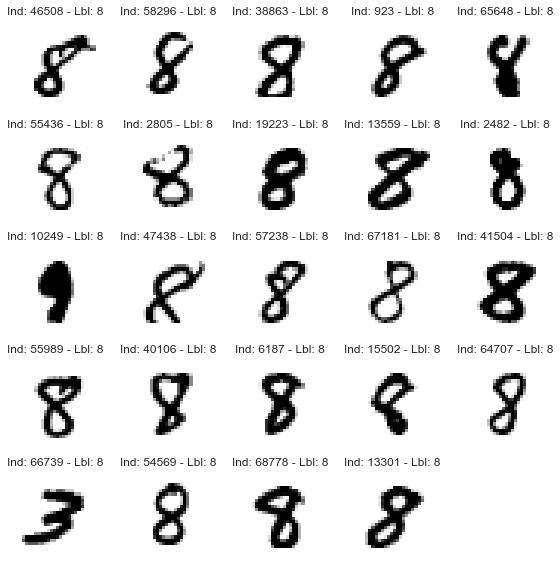

[22388 11303 65868 24063 17282 51956 59068 44757 47518 54158 26162 21423
 43608 50903 48381  1968 21067 42016 32308 24920 39481 20950 13472 62007]
9


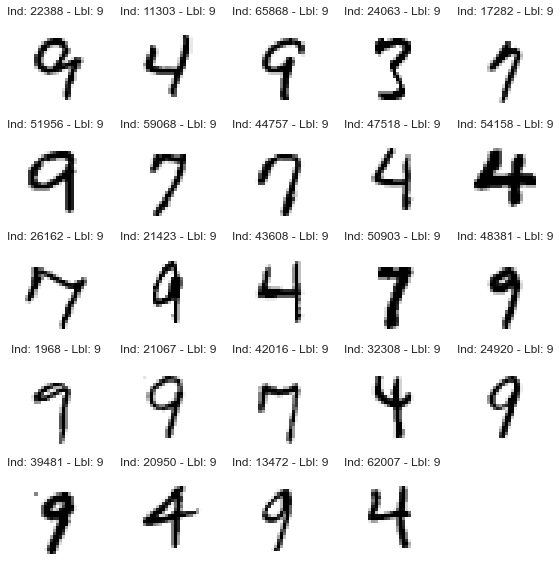

In [105]:
for i in range(10):
    sample_lab = df[df['cluster_label'] == i].index.values
    rows = df.loc[sample_lab,:].sample(24)
    print_ind = rows.index.values
    y_tmp = np.full(240, i)
    ind_tmp = np.array(range(0,24))
    print(print_ind)
    print(i)
    showDigits(df.drop(columns={'cluster_label'}).to_numpy(), y_tmp, print_ind)



## GMM gernerator

In [106]:
generators_gmm = []

for n in range(10):
    gmm = GaussianMixture(covariance_type='full', random_state=0)
    data_gmm = np.array(df[df['cluster_label'] == n].drop(columns={'cluster_label'}))
    gmm.fit(data_gmm)
    generators_gmm.append(gmm)
    print(str(n), "Converged:", gmm.converged_)

0 Converged: True
1 Converged: True
2 Converged: True
3 Converged: True
4 Converged: True
5 Converged: True
6 Converged: True
7 Converged: True
8 Converged: True
9 Converged: True


## Get new samples with GMM

In [108]:
data_new = generators_gmm[8].sample(10)
data_new = data_new[0]
print(data_new.shape)

(10, 784)


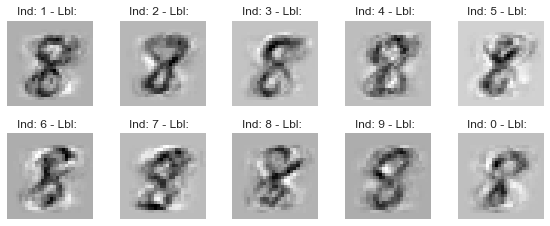

In [109]:
showDigits(digits=data_new, labels=[" ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " "], indexes=[1,2,3,4,5,6,7,8,9,0], size=28)

## Write numbers with the fumction

In [124]:
def writeNumber(number):
    ind_label = [int(d) for d in str(number)]
    label_n = len(ind_label)
    fig, axes = plt.subplots(1, label_n, figsize=(14, 6))
    
    for i, digit in enumerate(ind_label):
        samples = generators_gmm[digit].sample(100)
        selected_sample = samples[0][np.random.randint(100)]
        img = selected_sample.reshape(28, 28)
        axes[i].imshow(img, cmap=mpl.cm.binary, interpolation='nearest')
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        
    plt.show()

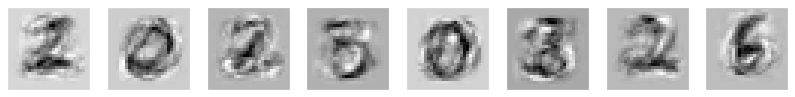

In [125]:
writeNumber(20230326)